In [1]:
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("max_columns", 80)

In [3]:
df = pd.read_csv('data/interim_data/cdc_data_cleaned.csv')

---

In [4]:
color_scheme = 'Reds'
beg_year = 2009
end_year = 2015

---

In [5]:
df['record_condition_1'].unique()

array(['O268', 'O881', 'O065', 'O998', 'O903', 'O16', 'O364', 'O961',
       'O266', 'O879', 'O249', 'O994', 'O150', 'O960', 'O993', 'O159',
       'O149', 'O720', 'O721', 'O223', 'O038', 'O441', 'O759', 'O754',
       'O969', 'O95', 'O970', 'O009', 'O711', 'O101', 'O432', 'O85',
       'O882', 'O908', 'O001', 'O622', 'O995', 'O142', 'O039', 'O13',
       'O109', 'O988', 'O100', 'O996', 'O25', 'O980', 'O987', 'O243',
       'O031', 'O468', 'O992', 'O241', 'O429', 'O904', 'O469', 'O152',
       'O991', 'O021', 'O411', 'O036', 'O909', 'O059', 'O971', 'O459',
       'O990', 'O035', 'O864', 'O730', 'O722', 'O235', 'O291', 'O056',
       'O11', 'O997', 'O263', 'O102', 'O234', 'O073', 'O748', 'O714',
       'O300', 'O069', 'O731', 'O020', 'O037', 'O751', 'O048', 'O269',
       'O898', 'O60', 'O880', 'O068', 'O460', 'O141', 'O103', 'O229',
       'O723', 'O230', 'O713', 'O078', 'O209', 'O200', 'O066', 'O40',
       'O058', 'O868', 'O029', 'O690', 'O985', 'O679', 'O873', 'O981',
       'O240',

In [6]:
df.head()

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,RESIDENTS,Not Available,February,37,"Hospital, Clinic or Medical Center",Married,Tuesday,2015,Natural,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O995,31O268,2,O268,O903,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
1,RESIDENTS,Not Available,January,56,"Hospital, Clinic or Medical Center",Widowed,Tuesday,2015,Natural,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O268,21O971,31O971,2,O268,O971,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
2,RESIDENTS,Not Available,March,31,Other,Married,Tuesday,2015,Natural,No,Not Available,O881,Obstetric embolism,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O993,21O881,Not Available,1,O881,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
3,INTRASTATE NONRESIDENTS,Not Available,April,24,"Hospital, Clinic or Medical Center",Divorced,Thursday,2015,Not Available,Unknown,Not Available,O065,Other and unspecified pregnancy with abortive ...,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",2,11O080,21O069,Not Available,1,O065,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
4,INSTRASTATE NONRESIDENTS,Not Available,July,28,"Hospital, Clinic or Medical Center","Never married, Single",Saturday,2015,Natural,No,Not Available,Combination of conditions classifiable to O99....,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O994,21O998,Not Available,2,O998,O994,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black


In [7]:
df['race'].unique()

array(['Black', 'White', 'American Indian (includes Aleuts and Eskimos)',
       'Chinese', 'Filipino', 'Asian Indian',
       'Other Asian or Pacific Islander in areas reporting codes 18-58',
       'Combined other Asian or Pacific Islander, includes codes 18-68',
       'Japanese', 'Vietnamese', 'Korean',
       'Hawaiian (includes Part-Hawaiian)', 'Guamanian', 'Samoan'],
      dtype=object)

In [8]:
df['race_recode_3'].unique()

array(['Black', 'White', 'Races other than White or Black'], dtype=object)

In [9]:
df['race_recode_5'].unique()

array(['Black', 'White', 'American Indian', 'Asian or Pacific Islander'],
      dtype=object)

In [10]:
df['hispanic_origin'].unique()

array(['Non – Hispanic', 'Mexican', 'South American', 'Central American',
       'Puerto Rican', 'Unknown', 'Central and South American',
       'Other Hispanic', 'Latin American', 'Cuban', 'Dominican',
       'Spaniard'], dtype=object)

In [11]:
df['hispanic_originrace_recode'].unique()

array(['Non - Hispanic black', 'Non - Hispanic white', 'Mexican',
       'Non - Hispanic other races', 'Central or South American',
       'Puerto Rican', 'Hispanic origin unknown',
       'Other or unknown Hispanic', 'Cuban'], dtype=object)

In [12]:
df['manner_of_death'].unique()

array(['Natural', 'Not Available', 'Could not determine',
       'Pending investigation', 'Accident', 'Homicide', 'Suicide'],
      dtype=object)

In [13]:
df.shape

(7135, 29)

In [14]:
df[df['hispanic_origin'] == 'Non – Hispanic'].count()

resident_status                                        5993
level_of_education                                     5993
month_of_death                                         5993
age                                                    5993
place_of_death_patient_status                          5993
marital_status                                         5993
day_of_week_of_death                                   5993
year                                                   5993
manner_of_death                                        5993
was_autopsy_done                                       5993
place_of_injury_for_icd_w00_y34_except_y06_and_y07_    5993
icd_code_10th_revision                                 5993
358_causes_of_death                                    5993
113_causes_of_death                                    5993
130_causes_of_infant_death                             5993
39_cause_recode                                        5993
number_of_entity_axis_conditions        

---

# Reusable DFs

In [15]:
df_hispanic = df[df["hispanic_origin"] != "Non – Hispanic"]

In [16]:
df_non_hispanic = df[df["hispanic_origin"] == "Non – Hispanic"]

In [17]:
# add ethnicity column
df_hispanic['ethnicity'] = 'Hispanic'
df_non_hispanic['ethnicity'] = df_non_hispanic['race_recode_3']

df = pd.concat([df_hispanic, df_non_hispanic], axis=0, join='inner')
df["ethnicity"].replace({"Races other than White or Black": "Other"}, inplace=True)

<ipython-input-17-f8bcb57189fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['ethnicity'] = 'Hispanic'
<ipython-input-17-f8bcb57189fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_hispanic['ethnicity'] = df_non_hispanic['race_recode_3']


In [18]:
df_eclampsia = df[df['358_causes_of_death'] == 'Eclampsia and pre-eclampsia']

In [19]:
df_single = df[df['marital_status'] == 'Never married, Single']

In [20]:
df_deaths_hosp_clin_med_center = df[df['place_of_death_patient_status'] == 'Hospital, Clinic or Medical Center']

---

In [21]:
df

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,ethnicity
25,RESIDENTS,3.0,January,49,"Hospital, Clinic or Medical Center",Divorced,Tuesday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",9,11O268,21O988,22O992,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
27,RESIDENTS,3.0,January,40,"Hospital, Clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",6,11O995,21O995,31O266,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
30,RESIDENTS,9.0,April,35,"Hospital, Clinic or Medical Center",Married,Friday,2015,Natural,Yes,Not Available,O720,Hemorrhage of pregnancy and childbirth and pla...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,21O720,22O991,1,O720,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
32,RESIDENTS,6.0,April,41,"Hospital, Clinic or Medical Center",Married,Wednesday,2015,Natural,No,Not Available,O721,Hemorrhage of pregnancy and childbirth and pla...,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O721,12O991,21O95,1,O721,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
36,INTRASTATE NONRESIDENTS,3.0,June,28,"Hospital, Clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O038,Spontaneous abortion,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",8,11O996,12O998,13O995,1,O038,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,RESIDENTS,4.0,October,33,"Hospital, Clinic or Medical Center",Married,Tuesday,2009,Not Available,No,Not Available,Combination of conditions classifiable to O99....,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",1,11O998,Not Available,Not Available,1,O998,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
7130,RESIDENTS,4.0,October,27,"Hospital, Clinic or Medical Center",Married,Thursday,2009,Natural,No,Not Available,unspecified pre-eclampsia,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O149,12O759,Not Available,1,O149,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
7131,RESIDENTS,6.0,December,25,"Hospital, Clinic or Medical Center","Never married, Single",Wednesday,2009,Not Available,No,Not Available,"Exhaustion and fatigue, Peripheral neuritis, o...",All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O268,21O995,Not Available,1,O268,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black,Black
7133,RESIDENTS,3.0,December,40,"Hospital, Clinic or Medical Center","Never married, Single",Saturday,2009,Natural,Yes,Not Available,Late maternal deaths,"Other deaths related to pregnancy, childbirth ...","Oth

In [22]:
df.shape

(7135, 30)

3417 rows in dataset => 3417 deaths
1108 black women deaths
2113 white women deaths
196 other races deaths

In [23]:
# Find total population of USA separated by race.
# If possible by white/black/other and by hispanic and non hispanic.

In [24]:
column1 = 'ethnicity'
column2 = 'place_of_death_patient_status'

grouped_by_ethnicity_and_death_place = df.groupby([column1, column2]).size()
grouped_by_ethnicity_and_death_place

ethnicity  place_of_death_patient_status     
Black      Decedent’s home                        278
           Hospice facility                        38
           Hospital, Clinic or Medical Center    1876
           Nursing home/long term care             24
           Other                                   52
           Place of death unknown                  29
Hispanic   Decedent’s home                        134
           Hospice facility                        18
           Hospital, Clinic or Medical Center     948
           Nursing home/long term care             10
           Other                                   30
           Place of death unknown                   2
Other      Decedent’s home                         47
           Hospice facility                         2
           Hospital, Clinic or Medical Center     336
           Nursing home/long term care              5
           Other                                    7
           Place of death unknown   

# How are hispanics represented among different races?

In [25]:
def group_by_race(df):
    return df.groupby(df['race_recode_3']).size()

In [26]:
grouped_by_race = group_by_race(df)
grouped_by_race

race_recode_3
Black                              2321
Races other than White or Black     413
White                              4401
dtype: int64

In [27]:
group_by_race(df_hispanic)

race_recode_3
Black                                24
Races other than White or Black      15
White                              1103
dtype: int64

In [28]:
group_by_race(df_non_hispanic)

race_recode_3
Black                              2297
Races other than White or Black     398
White                              3298
dtype: int64

# What does marital status look like proportionate to race/ethnicity?

In [29]:
x=df.groupby(["ethnicity"]) ["marital_status"].value_counts().head

In [30]:
print (x)

<bound method NDFrame.head of ethnicity  marital_status        
Black      Never married, Single     1405
           Married                    662
           Divorced                   161
           Marital Status unknown      43
           Widowed                     26
Hispanic   Married                    578
           Never married, Single      468
           Divorced                    76
           Marital Status unknown      12
           Widowed                      8
Other      Married                    257
           Never married, Single      106
           Divorced                    28
           Widowed                      4
           Marital Status unknown       3
White      Married                   1754
           Never married, Single     1001
           Divorced                   460
           Widowed                     59
           Marital Status unknown      24
Name: marital_status, dtype: int64>


In [31]:
# plot each death marital status in relation of total deathths from that ethnicity

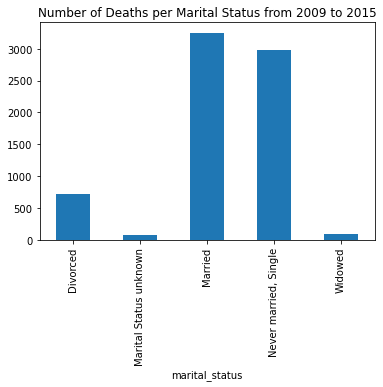

In [32]:
df.groupby(df['marital_status']).size().plot.bar(
    title=f'Number of Deaths per Marital Status from {beg_year} to {end_year}'
)

In [33]:
# Divide by total count
def create_marital_status_heatmap(df, column, normalization):
    event_count_table = pd.crosstab(
        index=df['marital_status'],
        columns=df[column],
        normalize=normalization
    )
    
    hmap = sns.heatmap(event_count_table, cmap=color_scheme, linewidths=1.5, annot=True)
    hmap.set_title(
        f'Deaths per Marital Status per {column} from {beg_year} to {end_year}'
    )
    
    return hmap

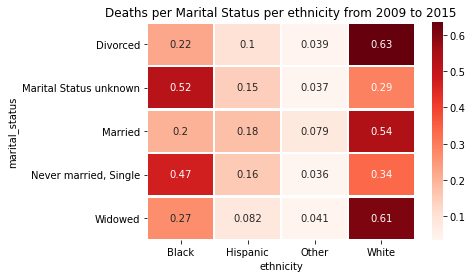

In [34]:
create_marital_status_heatmap(df, 'ethnicity', 'index')

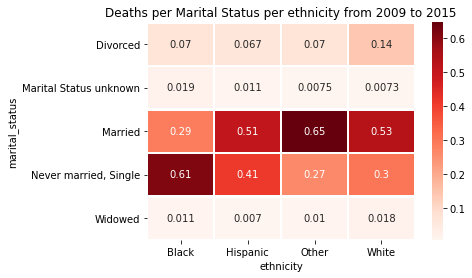

In [35]:
create_marital_status_heatmap(df, 'ethnicity', 'columns')

# How does the total deaths look like?

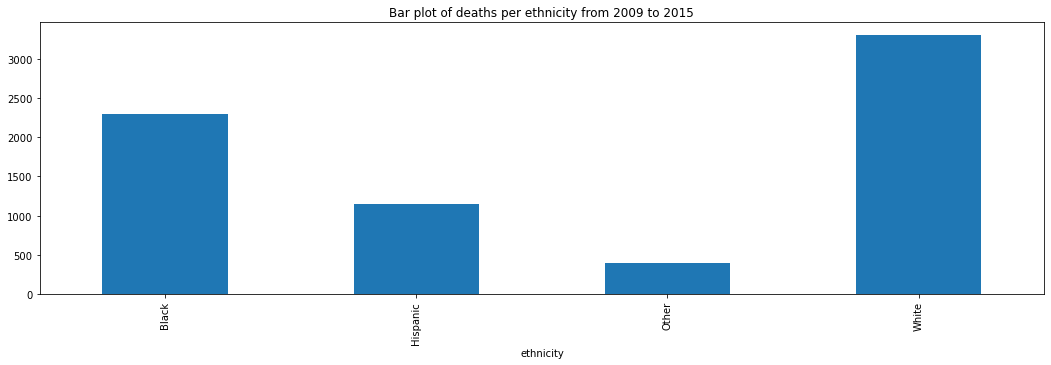

In [36]:
df.groupby(df['ethnicity']).size().plot.bar(
    title=f'Bar plot of deaths per ethnicity from {beg_year} to {end_year}',
    figsize=(18,5)
)

# We Need to find total population of black/white women to see what's the maternal mortality percentage.
# If possible, do same analysis including hispanic, and same anaylisys excluding hispanic

In [37]:
total_deaths = df.shape[0]
total_deaths

7135

In [38]:
df.groupby(df['ethnicity']).size()/total_deaths*100

ethnicity
Black       32.193413
Hispanic    16.005606
Other        5.578136
White       46.222845
dtype: float64

# How does the number of deaths change as the years go by?

In [39]:
total_deaths = df.shape[0]
total_deaths

7135

In [40]:
deaths_by_year = df.groupby(['year']).size()
deaths_by_year

year
2009     960
2010     829
2011     936
2012     993
2013    1142
2014    1131
2015    1144
dtype: int64

In [41]:
df_deaths_by_year = deaths_by_year.to_frame().reset_index().rename(columns={0:'total_count'})
df_deaths_by_year

,year,total_count
0,2009,960
1,2010,829
2,2011,936
3,2012,993
4,2013,1142
5,2014,1131
6,2015,1144


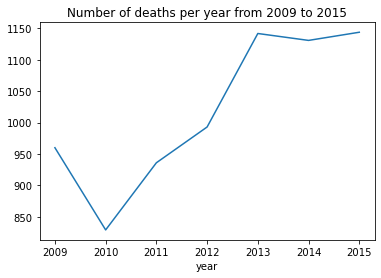

In [42]:
deaths_by_year.plot.line(
    title=f'Number of deaths per year from {beg_year} to {end_year}'
)

**It seems that there is a growing trend in the number of maternal deaths**

In [43]:
df_grouped_by_ethnicity_and_year = df.groupby(['ethnicity', 'year']).size()
df_grouped_by_ethnicity_and_year = df_grouped_by_ethnicity_and_year.reset_index()
df_grouped_by_ethnicity_and_year = df_grouped_by_ethnicity_and_year.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_year

,ethnicity,year,count
0,Black,2009,305
1,Black,2010,262
2,Black,2011,301
3,Black,2012,333
4,Black,2013,362
5,Black,2014,361
6,Black,2015,373
7,Hispanic,2009,184
8,Hispanic,2010,157
9,Hispanic,2011,133


In [44]:
def build_sns_lineplot_per_year(df, hue):
    ax = sns.lineplot(
        data=df,
        x='year',
        y="count",
        hue=hue,
    )
    ax.set_xlabel('Year')
    ax.set_title(
        f'Number of deaths per {hue} per year from {beg_year} to {end_year}'
    )

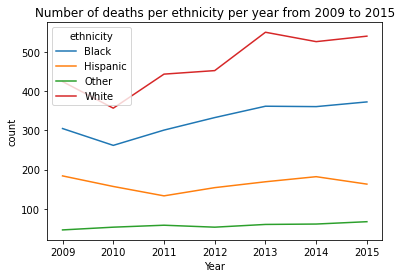

In [45]:
build_sns_lineplot_per_year(df_grouped_by_ethnicity_and_year, 'ethnicity')

**It seems that the growing trend in the total number of maternal deaths is true for the different ethnic groups looked at, with the exception of the hispanics.**

In [46]:
df_grouped_by_ethnicity_and_year['%'] = df_grouped_by_ethnicity_and_year.apply(
    lambda x:
    int(x['count']) / int(df_deaths_by_year[df_deaths_by_year['year'] == x['year']]['total_count'])*100,
    axis = 1
)
df_grouped_by_ethnicity_and_year

,ethnicity,year,count,%
0,Black,2009,305,31.770833
1,Black,2010,262,31.604343
2,Black,2011,301,32.158120
3,Black,2012,333,33.534743
4,Black,2013,362,31.698774
5,Black,2014,361,31.918656
6,Black,2015,373,32.604895
7,Hispanic,2009,184,19.166667
8,Hispanic,2010,157,18.938480
9,Hispanic,2011,133,14.209402


Text(0.5, 1.0, 'Deaths per year per ethnicity as a % of total deaths')

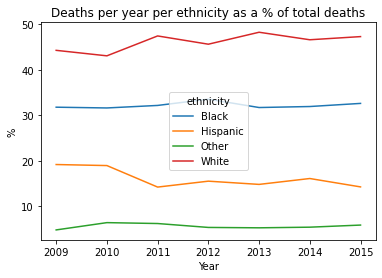

In [47]:
ax = sns.lineplot(
    data=df_grouped_by_ethnicity_and_year,
    x='year',
    y="%",
    hue='ethnicity',
)
ax.set_xlabel('Year')
ax.set_title(f'Deaths per year per ethnicity as a % of total deaths')

**When we look at the deaths per ethnicity as a percentage of total deaths per year, we can observe a growing trend for people with white ethnicity.**

In [48]:
df_grouped_by_marital_status_and_year = df.groupby(['marital_status', 'year']).size()
df_grouped_by_marital_status_and_year = df_grouped_by_marital_status_and_year.reset_index()
df_grouped_by_marital_status_and_year = df_grouped_by_marital_status_and_year.rename(columns={0:'count'})

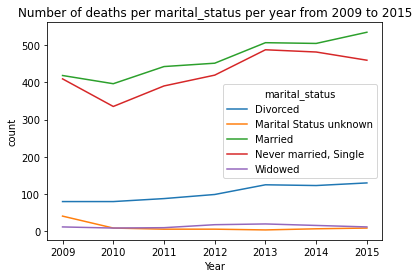

In [49]:
build_sns_lineplot_per_year(df_grouped_by_marital_status_and_year, 'marital_status')

In [50]:
df_grouped_by_marit_stat_eth_and_year = df.groupby(['marital_status', 'ethnicity', 'year']).size()
df_grouped_by_marit_stat_eth_and_year = df_grouped_by_marit_stat_eth_and_year.reset_index()
df_grouped_by_marit_stat_eth_and_year = df_grouped_by_marit_stat_eth_and_year.rename(columns={0:'count'})

In [51]:
df_grouped_by_marit_stat_eth_and_year['%'] = df_grouped_by_marit_stat_eth_and_year.apply(
    lambda x:
    int(x['count']) / int(df_deaths_by_year[df_deaths_by_year['year'] == x['year']]['total_count'])*100,
    axis = 1
)
df_grouped_by_marit_stat_eth_and_year[df_grouped_by_marit_stat_eth_and_year['ethnicity'] == 'Black'].head(40)

,marital_status,ethnicity,year,count,%
0,Divorced,Black,2009,13,1.354167
1,Divorced,Black,2010,18,2.171291
2,Divorced,Black,2011,18,1.923077
3,Divorced,Black,2012,23,2.316213
4,Divorced,Black,2013,30,2.626970
5,Divorced,Black,2014,22,1.945181
6,Divorced,Black,2015,37,3.234266
28,Marital Status unknown,Black,2009,27,2.812500
29,Marital Status unknown,Black,2010,3,0.361882
30,Marital Status unknown,Black,2011,2,0.213675


---

# Do different races/ethnicities die of the same causes proportionally?

In [52]:
def create_ethnicity_heatmap(df, column, normalization, annot = True):
    event_count_table = pd.crosstab(
        index=df['ethnicity'],
        columns=df[column],
        normalize=normalization
    )
    
    hmap = sns.heatmap(event_count_table, cmap=color_scheme, linewidths=1.5, annot=annot)
    hmap.set_title(f'Deaths per {column.replace("_", " ")} per ethnicity from {beg_year} to {end_year}')
    
    return hmap

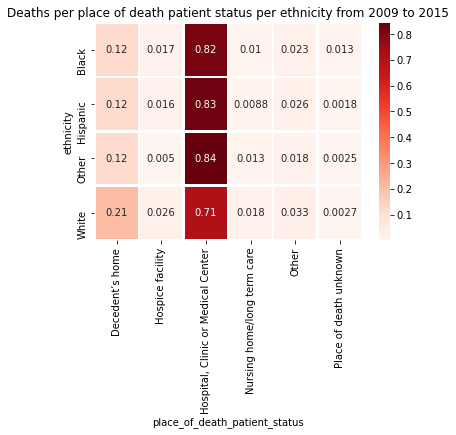

In [53]:
create_ethnicity_heatmap(df, 'place_of_death_patient_status', 'index')

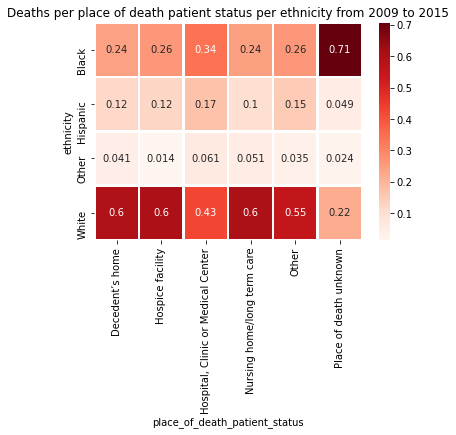

In [54]:
create_ethnicity_heatmap(df, 'place_of_death_patient_status', 'columns')

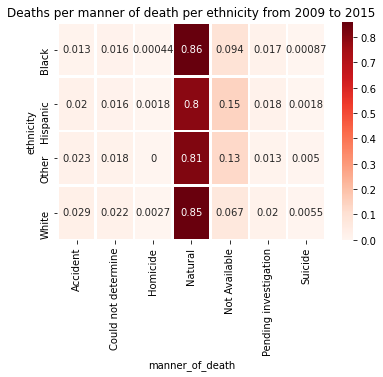

In [55]:
create_ethnicity_heatmap(df, 'manner_of_death', 'index')

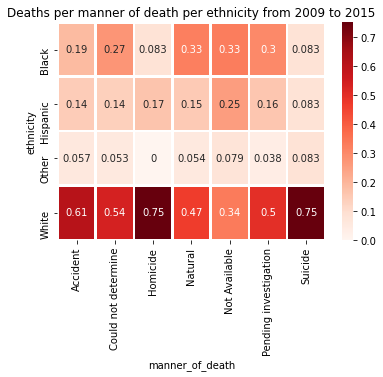

In [56]:
create_ethnicity_heatmap(df, 'manner_of_death', 'columns')

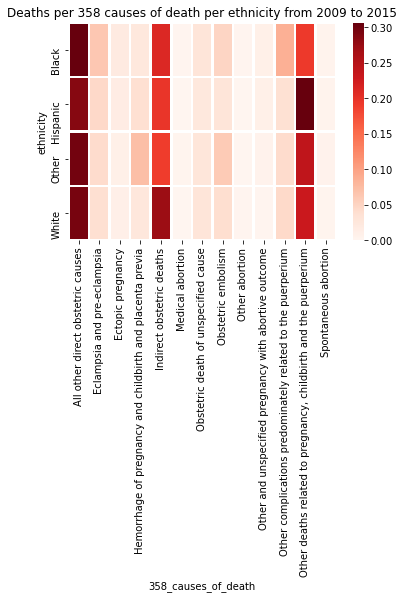

In [57]:
create_ethnicity_heatmap(df, '358_causes_of_death', 'index', False)

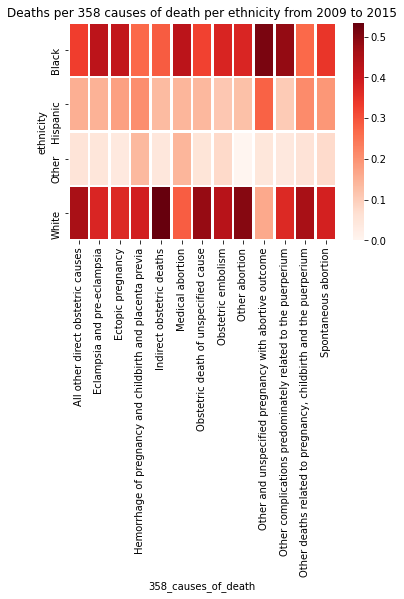

In [58]:
create_ethnicity_heatmap(df, '358_causes_of_death', 'columns', False)

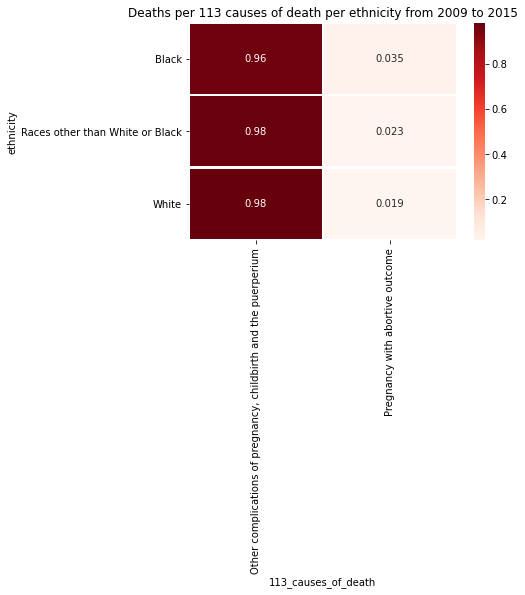

In [59]:
create_ethnicity_heatmap(df_non_hispanic, '113_causes_of_death', 'index')

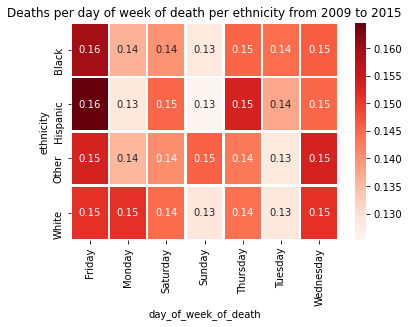

In [60]:
create_ethnicity_heatmap(df, 'day_of_week_of_death', 'index')

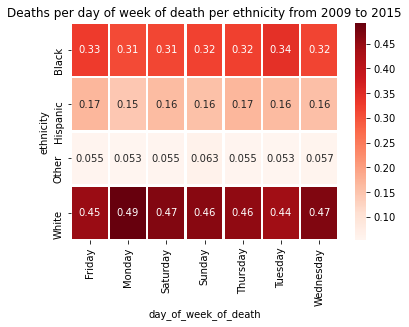

In [61]:
create_ethnicity_heatmap(df, 'day_of_week_of_death', 'columns')

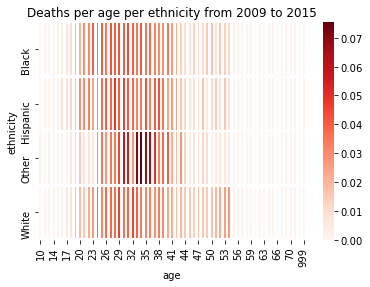

In [62]:
create_ethnicity_heatmap(df, 'age', 'index', False)

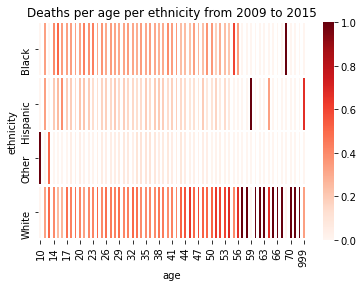

In [63]:
create_ethnicity_heatmap(df, 'age', 'columns', False)

**The main causes of death seem to be the same for each race analyzed.  It might be worth to investigate further why black women die more of eclampsia and pre-eclampsia.**

----

# Is the percentage of missing data constant for different ethnicities?

In [64]:
def get_na_numbers_per_ethnicity(df, ethnicity, column_name):
    df_ethnicity = df[df["ethnicity"] == ethnicity]
    na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']
    ethnicity_pct = len(na_ethnicity) / len(df_ethnicity)
    return ethnicity_pct

In [65]:
def compare_na_numbers_per_ethnicity(df, column_name):
    white = get_na_numbers_per_ethnicity(df, 'White', column_name)
    black = get_na_numbers_per_ethnicity(df, 'Black', column_name)
    hispanic = get_na_numbers_per_ethnicity(df, 'Hispanic', column_name)
    other = get_na_numbers_per_ethnicity(df, 'Other', column_name)

        
    print(f'The number of N/A records for the column {column_name} are {white} for white, {black} for black, {hispanic} for hispanic, {other} for other races')

In [66]:
compare_na_numbers_per_ethnicity(df, 'manner_of_death')

The number of N/A records for the column manner_of_death are 0.06731352334748332 for white, 0.09447104919460166 for black, 0.14711033274956217 for hispanic, 0.1306532663316583 for other races


<ipython-input-64-c46ae4644659>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']


In [67]:
compare_na_numbers_per_ethnicity(df, 'icd_code_10th_revision')

The number of N/A records for the column icd_code_10th_revision are 0.0 for white, 0.0 for black, 0.0 for hispanic, 0.0 for other races


<ipython-input-64-c46ae4644659>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_ethnicity = df_ethnicity[df[column_name] == 'Not Available']


In [68]:
# Finish missing values analysis

-----

# What's the most common icd causes of death among each ethnicity?

In [69]:
pd.set_option('display.max_colwidth', None)

In [70]:
def most_common_icd_10_code(df):
    icd_causes_of_death_by_ethnicity = df.groupby(["ethnicity", "icd_code_10th_revision"]).size().to_frame().reset_index()
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.rename(columns={0:'count'})
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.sort_values(['ethnicity', 'count'], ascending = (True, False))
    icd_causes_of_death_by_ethnicity = icd_causes_of_death_by_ethnicity.groupby('ethnicity').head(5)
    return icd_causes_of_death_by_ethnicity

In [71]:
df['icd_code_10th_revision'].unique()

array(['O266', 'O720', 'O721', 'O038',
       'Exhaustion and fatigue, Peripheral neuritis, or Renal disease',
       'Death from direct obstetric cause occurring more than 42 days but less than one year after delivery',
       'Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery',
       'O754', 'O969', 'O001', 'O881', 'O95', 'O13',
       'Eclampsia in pregnancy',
       'Combination of conditions classifiable to O99.0-O99.7', 'O759',
       'Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium',
       'O711', 'O469', 'O970', 'HELLP syndrome', 'O993', 'O100',
       'Supervision of pregnancy with history of infertility, third trimester',
       'O622', 'O009', 'O882', 'Eclampsia, unspecified as to time period',
       'Pre-eclampsia superimposed on chronic hypertension', 'O988',
       'O263', 'O996', 'O234', 'O300', 'O069', 'O731', 'O249', 'O035',
       'O432', 'O995', 'O987', 'Unspecified matern

In [72]:
df_most_common_icd_10 = most_common_icd_10_code(df)
df_most_common_icd_10

,ethnicity,icd_code_10th_revision,count
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",387
0,Black,Combination of conditions classifiable to O99.0-O99.7,196
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",167
1,Black,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,159
117,Black,"Supervision of pregnancy with history of infertility, third trimester",151
126,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",177
128,Hispanic,Late maternal deaths,122
120,Hispanic,Combination of conditions classifiable to O99.0-O99.7,107
122,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,105
121,Hispanic,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,98


In [73]:
df_most_common_icd_10_eclampsia = most_common_icd_10_code(df_eclampsia)
df_most_common_icd_10_eclampsia

,ethnicity,icd_code_10th_revision,count
8,Black,Unspecified maternal hypertension,42
9,Black,unspecified pre-eclampsia,38
1,Black,"Eclampsia, unspecified as to time period",33
2,Black,HELLP syndrome,10
0,Black,Eclampsia in pregnancy,6
11,Hispanic,"Eclampsia, unspecified as to time period",13
17,Hispanic,unspecified pre-eclampsia,13
16,Hispanic,Unspecified maternal hypertension,7
12,Hispanic,HELLP syndrome,6
14,Hispanic,O141*,5


In [74]:
df_most_common_icd_10['% of total deaths'] = df_most_common_icd_10.apply(
    lambda x:
    int(x['count']) / int(total_deaths)*100,
    axis = 1
)
df_most_common_icd_10

,ethnicity,icd_code_10th_revision,count,% of total deaths
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",387,5.423966
0,Black,Combination of conditions classifiable to O99.0-O99.7,196,2.747022
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",167,2.340575
1,Black,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,159,2.228451
117,Black,"Supervision of pregnancy with history of infertility, third trimester",151,2.116328
126,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",177,2.480729
128,Hispanic,Late maternal deaths,122,1.709881
120,Hispanic,Combination of conditions classifiable to O99.0-O99.7,107,1.499650
122,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,105,1.471619
121,Hispanic,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,98,1.373511


In [75]:
df_most_common_icd_10_eclampsia['% of total deaths'] = df_most_common_icd_10_eclampsia.apply(
    lambda x:
    int(x['count']) / int(total_deaths)*100,
    axis = 1
)
df_most_common_icd_10_eclampsia

,ethnicity,icd_code_10th_revision,count,% of total deaths
8,Black,Unspecified maternal hypertension,42,0.588648
9,Black,unspecified pre-eclampsia,38,0.532586
1,Black,"Eclampsia, unspecified as to time period",33,0.462509
2,Black,HELLP syndrome,10,0.140154
0,Black,Eclampsia in pregnancy,6,0.084093
11,Hispanic,"Eclampsia, unspecified as to time period",13,0.182200
17,Hispanic,unspecified pre-eclampsia,13,0.182200
16,Hispanic,Unspecified maternal hypertension,7,0.098108
12,Hispanic,HELLP syndrome,6,0.084093
14,Hispanic,O141*,5,0.070077


Looking at the most common icd 10 codes per ethnicity, we don't see any signifcant trend.  We then decided to take a further look at the women with pre-elampsia and eclampsia, since we noticed in an earlier step that Black women seem to die more from it when compared to other races.
The number of deaths of Black Women in the top 3 categories is very high, considering that they represent a much smaller part of the population.
As pre-elampsia and eclampsia are known high risk factors, maybe some of those deaths could be prevented. 

Since we also noticed that black single women seem to die at a very high rate, we decided to investigate further the causes of their death, but 

In [76]:
df_most_common_icd_10_single = most_common_icd_10_code(df_single)
df_most_common_icd_10_single

,ethnicity,icd_code_10th_revision,count
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",236
0,Black,Combination of conditions classifiable to O99.0-O99.7,116
1,Black,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,104
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",104
99,Black,"Supervision of pregnancy with history of infertility, third trimester",99
108,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",74
110,Hispanic,Late maternal deaths,48
102,Hispanic,Combination of conditions classifiable to O99.0-O99.7,45
104,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,42
105,Hispanic,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",34


In [77]:
df_most_common_icd_10_single['% of total deaths'] = df_most_common_icd_10_single.apply(
    lambda x:
    int(x['count']) / int(total_deaths)*100,
    axis = 1
)
df_most_common_icd_10_single

,ethnicity,icd_code_10th_revision,count,% of total deaths
6,Black,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",236,3.307638
0,Black,Combination of conditions classifiable to O99.0-O99.7,116,1.625788
1,Black,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,104,1.457603
3,Black,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",104,1.457603
99,Black,"Supervision of pregnancy with history of infertility, third trimester",99,1.387526
108,Hispanic,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",74,1.037141
110,Hispanic,Late maternal deaths,48,0.672740
102,Hispanic,Combination of conditions classifiable to O99.0-O99.7,45,0.630694
104,Hispanic,Death from indirect obstetric cause occurring more than 42 days but less than one year after delivery,42,0.588648
105,Hispanic,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",34,0.476524


---

In [78]:
df['level_of_education'].describe()

count     7135
unique      10
top        3.0
freq      2381
Name: level_of_education, dtype: object

In [79]:
df['level_of_education'].unique()

array(['3.0', '9.0', '6.0', 'no education item on certificate', '5.0',
       '4.0', '7.0', '2003 revision of education item on certificate',
       '8.0', 'Not Available'], dtype=object)

In [80]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of deaths per ethnicity from 2009 to 2015')

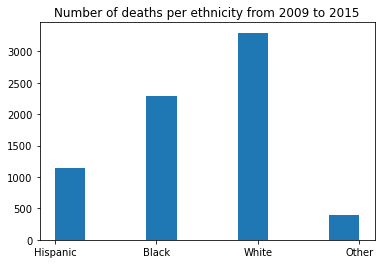

In [81]:
plt.hist(df['ethnicity'])
plt.title(f'Number of deaths per ethnicity from {beg_year} to {end_year}')

In [82]:
df_grouped_by_ethnicity_and_age = df.groupby(['ethnicity', 'age']).size()
df_grouped_by_ethnicity_and_age = df_grouped_by_ethnicity_and_age.reset_index()
df_grouped_by_ethnicity_and_age = df_grouped_by_ethnicity_and_age.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_age

,ethnicity,age,count
0,Black,12,1
1,Black,14,2
2,Black,15,6
3,Black,16,9
4,Black,17,16
...,...,...,...
182,White,67,2
183,White,70,1
184,White,75,1
185,White,77,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Deaths per ethnicity per age from 2009 to 2015')

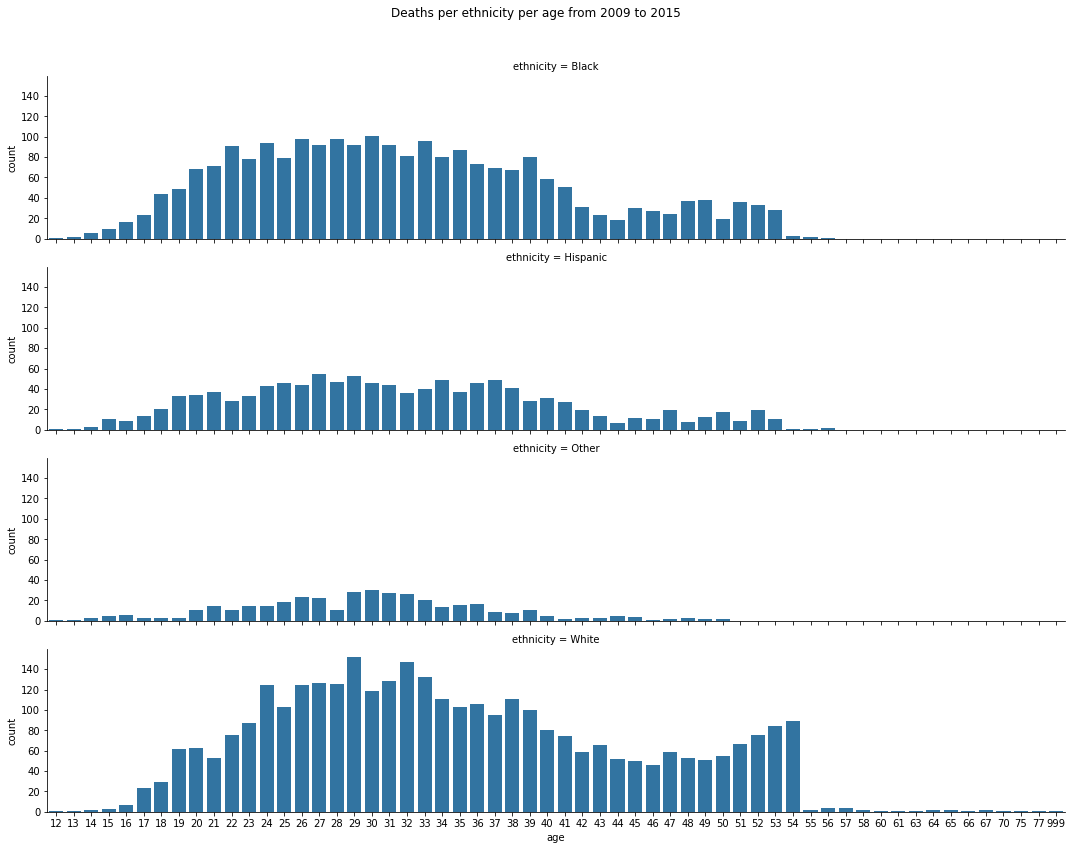

In [83]:
chart = sns.FacetGrid(
    df_grouped_by_ethnicity_and_age,
    col='ethnicity',
    margin_titles=True,
    col_wrap=1,
    aspect=5,
    row_order=df['ethnicity'].unique
)

# to actually plot
chart.map(sns.barplot, 'age', 'count')
chart.fig.subplots_adjust(top=0.9)
chart.fig.suptitle(
    f'Deaths per ethnicity per age from {beg_year} to {end_year}'
)

Text(0.5, 0.98, 'Deaths per age per ethnicity from 2009 to 2015')

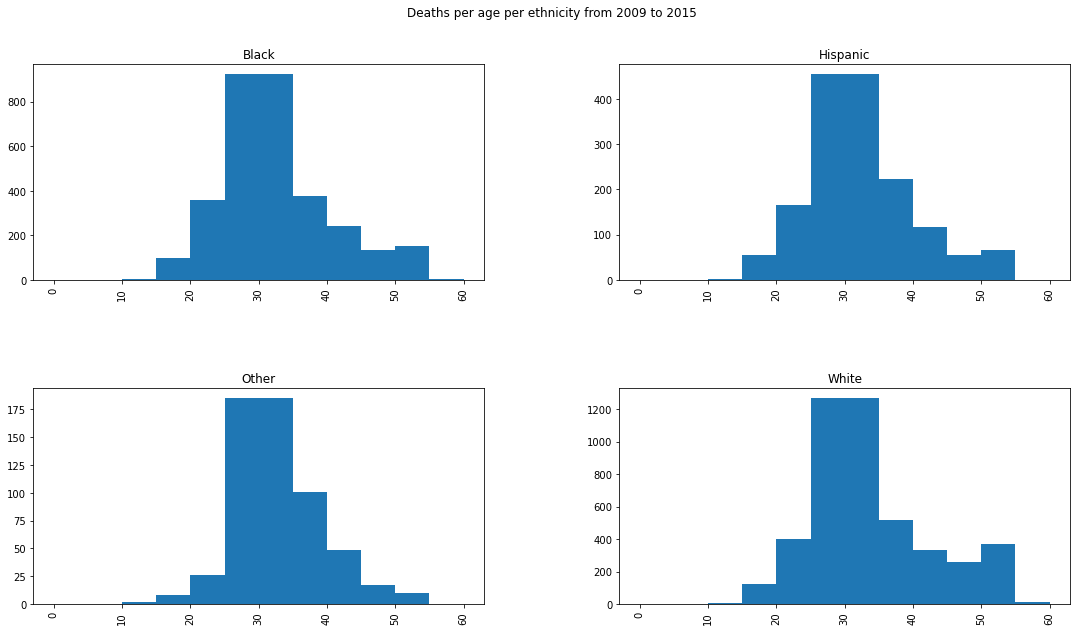

In [84]:
df.hist(by ='ethnicity',
       column ='age', bins=[0,5,10,15,20,25,35,40,45,50,55,60],
       figsize=(18,10)
       )
plt.suptitle(f'Deaths per age per ethnicity from {beg_year} to {end_year}')


Text(0.5, 1.0, 'Deaths per age from 2009 to 2015')

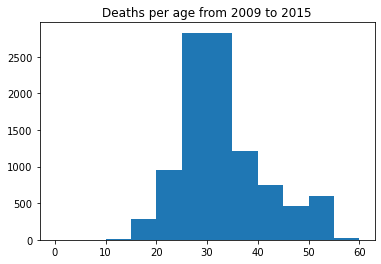

In [85]:
plt.hist(df['age'], bins=[0,5,10,15,20,25,35,40,45,50,55,60])
plt.title(f'Deaths per age from {beg_year} to {end_year}')

Text(0.5, 1.0, 'Deaths per ethnicity from 2009 to 2015')

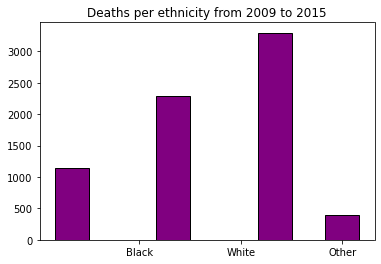

In [86]:
plt.hist(df['ethnicity'], bins=9, align='right', color='purple', edgecolor='black')
plt.title(f'Deaths per ethnicity from {beg_year} to {end_year}')

Text(0.5, 1.0, 'Deaths per ethnicity from 2009 to 2015')

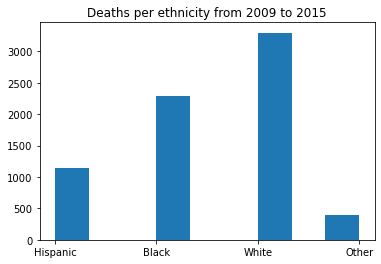

In [87]:
plt.hist(df['ethnicity'], bins=9)
plt.title(f'Deaths per ethnicity from {beg_year} to {end_year}')

In [88]:
my_contingency_table = pd.crosstab(index = df['ethnicity'], columns = df["age"])
my_contingency_table

age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,70,75,77,999
ethnicity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Black,0,1,0,2,6,9,16,23,44,49,68,71,91,78,94,79,98,92,98,92,101,92,81,96,80,87,73,69,67,80,59,51,31,23,18,30,27,24,37,38,19,36,33,28,3,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Hispanic,0,1,0,1,3,10,9,13,20,33,34,37,28,33,43,46,44,55,47,53,46,44,36,40,49,37,46,49,41,28,31,27,19,13,7,11,10,19,8,12,17,9,19,10,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2
Other,1,0,1,0,0,0,0,3,5,6,3,3,3,11,14,11,14,14,18,23,22,11,28,30,27,26,20,13,15,16,9,8,11,5,2,3,3,5,4,1,2,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
White,0,1,1,2,3,7,23,29,62,63,53,75,87,124,103,124,126,125,152,119,128,147,132,111,103,106,95,111,100,80,74,59,66,52,50,46,59,53,51,55,67,75,84,89,2,4,4,2,0,1,1,1,2,2,1,2,0,1,1,1,1


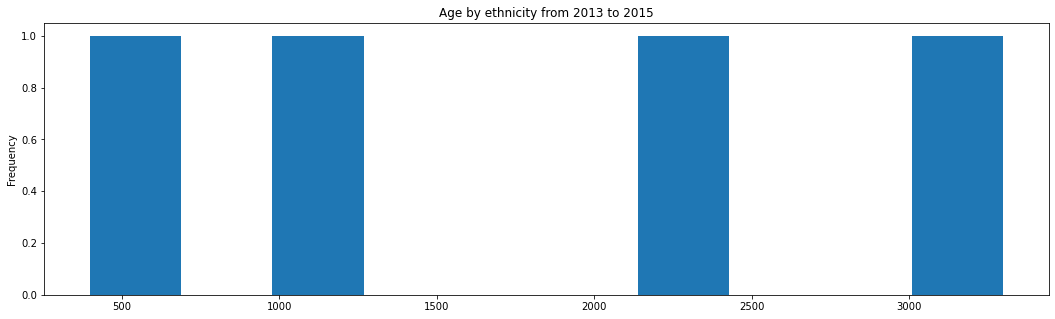

In [89]:
df.groupby(df['ethnicity']).size().plot.hist(
    title=f'Age by ethnicity from 2013 to 2015',
    figsize=(18,5)
)

In [90]:
df_accidental_death = df.groupby('manner_of_death')
df_accidental_death.head(10)

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,ethnicity
25,RESIDENTS,3.0,January,49,"Hospital, Clinic or Medical Center",Divorced,Tuesday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",9,11O268,21O988,22O992,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
27,RESIDENTS,3.0,January,40,"Hospital, Clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O266,All other direct obstetric causes,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",6,11O995,21O995,31O266,2,O266,O268,Not Available,White,White,White,Mexican,Mexican,Hispanic
30,RESIDENTS,9.0,April,35,"Hospital, Clinic or Medical Center",Married,Friday,2015,Natural,Yes,Not Available,O720,Hemorrhage of pregnancy and childbirth and placenta previa,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,21O720,22O991,1,O720,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
32,RESIDENTS,6.0,April,41,"Hospital, Clinic or Medical Center",Married,Wednesday,2015,Natural,No,Not Available,O721,Hemorrhage of pregnancy and childbirth and placenta previa,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",3,11O721,12O991,21O95,1,O721,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
36,INTRASTATE NONRESIDENTS,3.0,June,28,"Hospital, Clinic or Medical Center",Married,Sunday,2015,Natural,No,Not Available,O038,Spontaneous abortion,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",8,11O996,12O998,13O995,1,O038,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,RESIDENTS,7.0,October,38,Hospice facility,Divorced,Friday,2013,Suicide,No,Home,O993,Indirect obstetric deaths,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",5,11O993,21T509,22X64,4,O993,T383,T509,White,White,White,Non – Hispanic,Non - Hispanic white,White
5909,RESIDENTS,no education item on certificate,February,47,Decedent’s home,Married,Monday,2010,Homicide,No,Unspecified place,Combination of conditions classifiable to O99.0-O99.7,Indirect obstetric deaths,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",3,11O998,61T149,62Y09,3,O998,T149,Y09,White,White,White,Non – Hispanic,Non - Hispanic white,White
5913,INTRASTATE NONRESIDENTS,3.0,May,53,"Hospital, Clinic or Medical Center",Widowed,Thursday,2010,Homicide,No,Unspecified place,"Diseases of the circulatory system complicating pregnancy, childbirth and the puerperium",Indirect obstetric deaths,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,61T149,62Y09,3,O994,T149,Y09,White,White,White,Non – Hispanic,Non - Hispanic white,White
6451,RESIDENTS,6.0,June,28,Decedent’s home,Married,Tuesday,2009,Homicide,Yes,Unspecified place,"Exhaustion and fatigue, Peripheral neuritis, or Renal disease",All other direct obstetric causes,"Other 

In [91]:
df_grouped_by_ethnicity_and_manner_of_death = df.groupby(['ethnicity', 'manner_of_death']).size()
df_grouped_by_ethnicity_and_manner_of_death = df_grouped_by_ethnicity_and_manner_of_death.reset_index()
df_grouped_by_ethnicity_and_manner_of_death = df_grouped_by_ethnicity_and_manner_of_death.rename(columns={0:'count'})
df_grouped_by_ethnicity_and_manner_of_death

,ethnicity,manner_of_death,count
0,Black,Accident,30
1,Black,Could not determine,36
2,Black,Homicide,1
3,Black,Natural,1971
4,Black,Not Available,217
5,Black,Pending investigation,40
6,Black,Suicide,2
7,Hispanic,Accident,23
8,Hispanic,Could not determine,18
9,Hispanic,Homicide,2


In [92]:
df_accidental_death = df[df['manner_of_death'] == 'Accident']

In [93]:
df_accidental_death

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,ethnicity
1255,RESIDENTS,4.0,August,39,"Hospital, Clinic or Medical Center",Married,Tuesday,2014,Accident,Yes,Not Available,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,"Other deaths related to pregnancy, childbirth and the puerperium","Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",3,11O960,21O960,61O960,1,O960,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
1698,RESIDENTS,2003 revision of education item on certificate,July,999,Decedent’s home,"Never married, Single",Friday,2014,Accident,Yes,Not Available,O95,Obstetric death of unspecified cause,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",2,11O95,61O95,Not Available,1,O95,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
2214,RESIDENTS,2003 revision of education item on certificate,June,31,"Hospital, Clinic or Medical Center",Married,Monday,2014,Accident,Yes,Not Available,O754,All other direct obstetric causes,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",5,11O991,12O754,21O754,1,O754,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
2366,RESIDENTS,2003 revision of education item on certificate,August,43,"Hospital, Clinic or Medical Center","Never married, Single",Thursday,2013,Accident,Yes,Not Available,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,"Other deaths related to pregnancy, childbirth and the puerperium","Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",3,11O960,21O960,31O960,1,O960,Not Available,Not Available,White,White,White,Mexican,Mexican,Hispanic
2392,RESIDENTS,3.0,December,32,Other,Married,Monday,2013,Accident,Yes,Other Specified Places,Death from direct obstetric cause occurring more than 42 days but less than one year after delivery,"Other deaths related to pregnancy, childbirth and the puerperium","Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",6,11O960,12O961,21O960,4,O960,T68,T758,White,White,White,Mexican,Mexican,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,RESIDENTS,4.0,May,32,Decedent’s home,"Never married, Single",Wednesday,2009,Accident,Yes,Not Available,O97,"Other deaths related to pregnancy, childbirth and the puerperium","Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",2,11O97,61O97,Not Available,1,O97,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white,White
6793,RESIDENTS,3.0,December,22,"Hospital, Clinic or Medical Center",Married,Friday,2009,Accident,No,Trade and service area,O993,Indirect obstetric deaths,"Other complications of pregnancy, childbirth and the puerperium",Not Available,"Pregnancy, childbirth and the puerperium",6,11T406,12X42,21T179,6,O993,T179,T406,White,White,White,Non – Hispanic,Non - Hispanic white,White
6845,RESIDENTS,Not Available,June,41,Decedent’s home,Divorced,Saturday,2009,Accident,Unknown,Unspecified place,"Diseases o

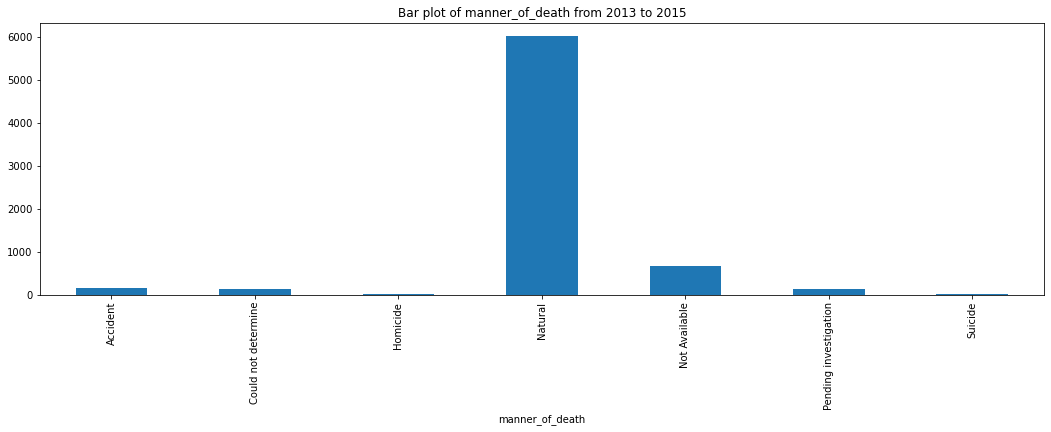

In [94]:
df.groupby(df['manner_of_death']).size().plot.bar(
    title=f'Bar plot of manner_of_death from 2013 to 2015',
    figsize=(18,5)
)

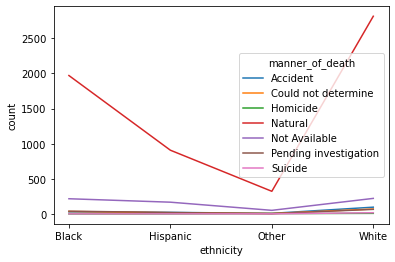

In [95]:
ax = sns.lineplot(
    data=df_grouped_by_ethnicity_and_manner_of_death,
    x='ethnicity',
    y="count",
    hue='manner_of_death',
)

Text(0.5, 0.98, 'Deaths per manner of death per ethnicity')

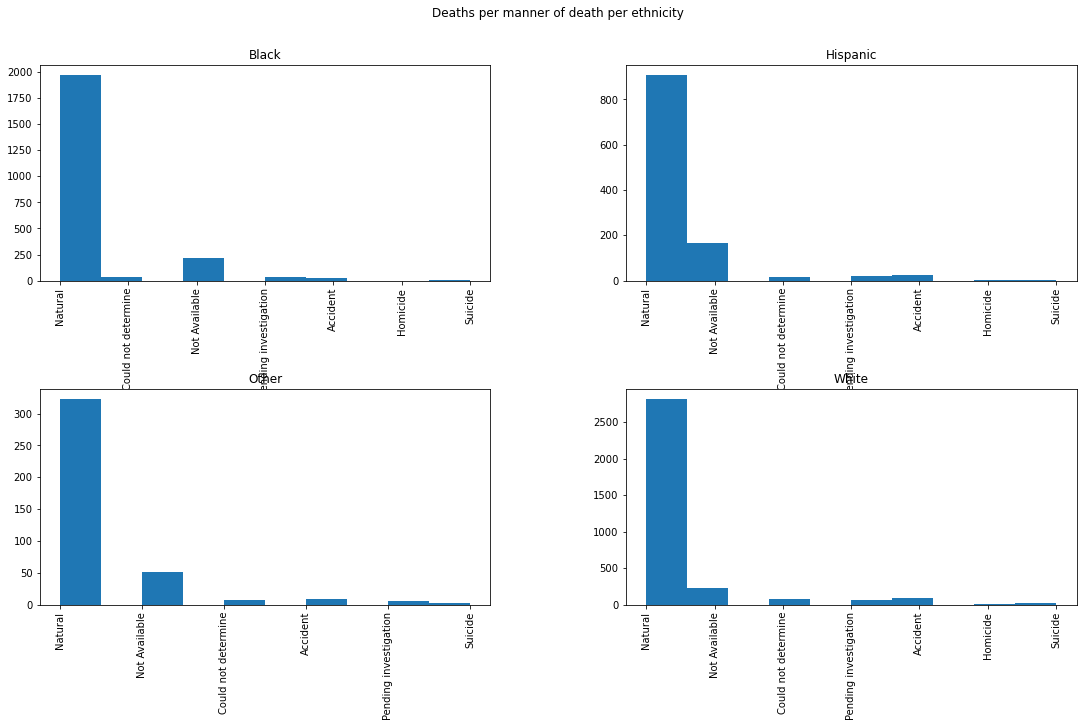

In [96]:
df.hist(by ='ethnicity',
       column ='manner_of_death',
       figsize=(18,10)
       )
plt.suptitle("Deaths per manner of death per ethnicity")

Text(0.5, 0.98, 'Number of autopsies for maternal deaths per ethnicity')

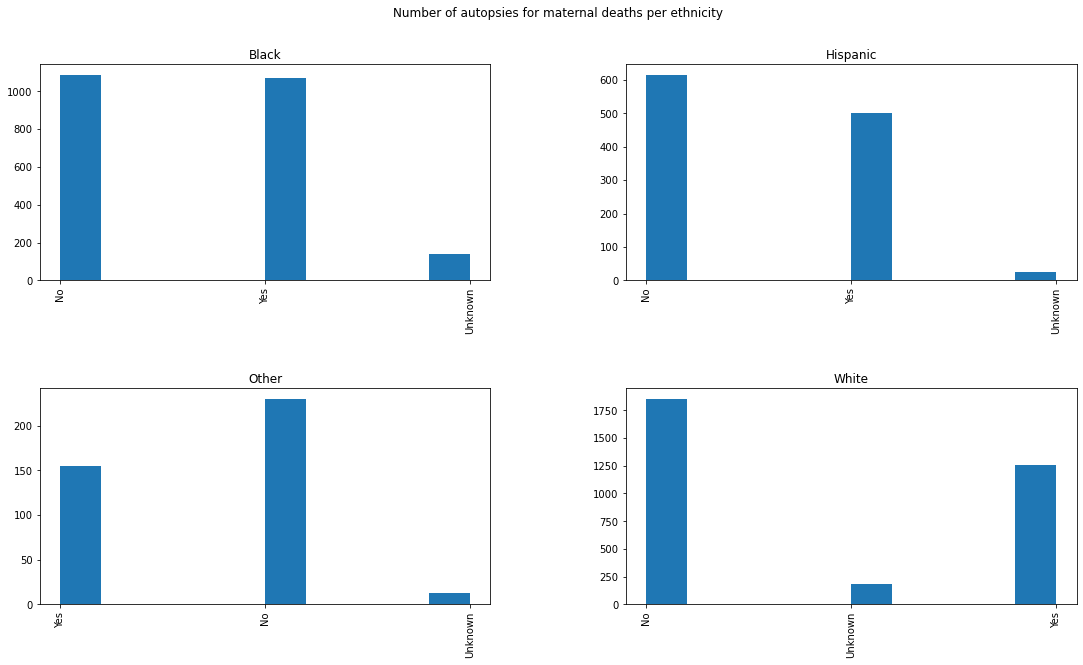

In [97]:
df.hist(by ='ethnicity',
       column ='was_autopsy_done',
       figsize=(18,10)
       )
plt.suptitle("Number of autopsies for maternal deaths per ethnicity")

In [98]:
df.to_csv('data/interim_data/cdc_data_cleaned_with_ethnicities.csv', index=False)